In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2021-01-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2021_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-01-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,남구,8175,남구,750,10.1%,"7,800"
1,2021-01-07,간장,오복왕표 0.9ℓ 1병,6300,남구,6300,남구,0,0.0%,"6,300"
2,2021-01-07,갈치,60cm정도 500g 1마리(냉동),11519,남구,13906,남구,2387,20.72%,"12,713"
3,2021-01-07,고등어,30㎝정도 500g 1마리,4422,남구,4603,남구,181,4.09%,"4,513"
4,2021-01-07,달걀,오경슈퍼란60g정도 10개,2980,남구,2990,남구,10,0.34%,"2,985"
5,2021-01-07,닭고기,육계 1.0㎏,5495,남구,7725,남구,2230,40.58%,"6,610"
6,2021-01-07,대파,1.0㎏,3999,남구,5047,남구,1048,26.21%,"4,523"
7,2021-01-07,돼지고기,삼겹살 500g,10450,남구,15900,남구,5450,52.15%,"13,175"
8,2021-01-07,두부,500g 판두부(국산포장두부 420g) 1모,4531,남구,4531,남구,0,0.0%,"4,531"
9,2021-01-07,라면,신라면 120g 1봉지,676,남구,676,남구,0,0.0%,676


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2021-04-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2021_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-04-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,남구,8175,남구,750,10.1%,"7,800"
1,2021-04-08,간장,오복왕표 0.9ℓ 1병,6300,남구,6300,남구,0,0.0%,"6,300"
2,2021-04-08,갈치,60cm정도 500g 1마리(냉동),9987,남구,13141,남구,3154,31.58%,"11,564"
3,2021-04-08,고등어,30㎝정도 500g 1마리,5042,남구,5276,남구,234,4.64%,"5,159"
4,2021-04-08,달걀,오경슈퍼란60g정도 10개,3480,남구,3890,남구,410,11.78%,"3,685"
5,2021-04-08,닭고기,육계 1.0㎏,4980,남구,7495,남구,2515,50.5%,"6,238"
6,2021-04-08,대파,1.0㎏,6873,남구,8071,남구,1198,17.43%,"7,472"
7,2021-04-08,돼지고기,삼겹살 500g,10450,남구,15900,남구,5450,52.15%,"13,175"
8,2021-04-08,두부,500g 판두부(국산포장두부 420g) 1모,4531,남구,5194,남구,663,14.63%,"4,863"
9,2021-04-08,라면,신라면 120g 1봉지,676,남구,676,남구,0,0.0%,676


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2021-07-08"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2021_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-07-08,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,남구,8175,남구,750,10.1%,"7,800"
1,2021-07-08,간장,오복왕표 0.9ℓ 1병,5024,남구,6300,남구,1276,25.4%,"5,662"
2,2021-07-08,갈치,60cm정도 500g 1마리(냉동),14875,남구,15692,남구,817,5.49%,"15,284"
3,2021-07-08,고등어,30㎝정도 500g 1마리,7528,남구,7617,남구,89,1.18%,"7,573"
4,2021-07-08,달걀,오경슈퍼란60g정도 10개,4000,남구,4680,남구,680,17.0%,"4,340"
5,2021-07-08,닭고기,육계 1.0㎏,5680,남구,7495,남구,1815,31.95%,"6,588"
6,2021-07-08,대파,1.0㎏,1926,남구,2536,남구,610,31.67%,"2,231"
7,2021-07-08,돼지고기,삼겹살 500g,12950,남구,16900,남구,3950,30.5%,"14,925"
8,2021-07-08,두부,500g 판두부(국산포장두부 420g) 1모,4531,남구,5194,남구,663,14.63%,"4,863"
9,2021-07-08,라면,신라면 120g 1봉지,676,남구,676,남구,0,0.0%,676


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "남구"
region_code = "5"
target_date = "2021-10-07"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("남구2021_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2021-10-07,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,남구,8175,남구,750,10.1%,"7,800"
1,2021-10-07,간장,오복왕표 0.9ℓ 1병,5770,남구,6829,남구,1059,18.35%,"6,300"
2,2021-10-07,갈치,60cm정도 500g 1마리(냉동),8866,남구,9169,남구,303,3.42%,"9,018"
3,2021-10-07,고등어,30㎝정도 500g 1마리,4925,남구,6378,남구,1453,29.5%,"5,652"
4,2021-10-07,달걀,오경슈퍼란60g정도 10개,3980,남구,4000,남구,20,0.5%,"3,990"
5,2021-10-07,닭고기,육계 1.0㎏,6280,남구,7495,남구,1215,19.35%,"6,888"
6,2021-10-07,대파,1.0㎏,2990,남구,3024,남구,34,1.14%,"3,007"
7,2021-10-07,돼지고기,삼겹살 500g,11950,남구,18400,남구,6450,53.97%,"15,175"
8,2021-10-07,두부,500g 판두부(국산포장두부 420g) 1모,4531,남구,5194,남구,663,14.63%,"4,863"
9,2021-10-07,라면,신라면 120g 1봉지,736,남구,736,남구,0,0.0%,736


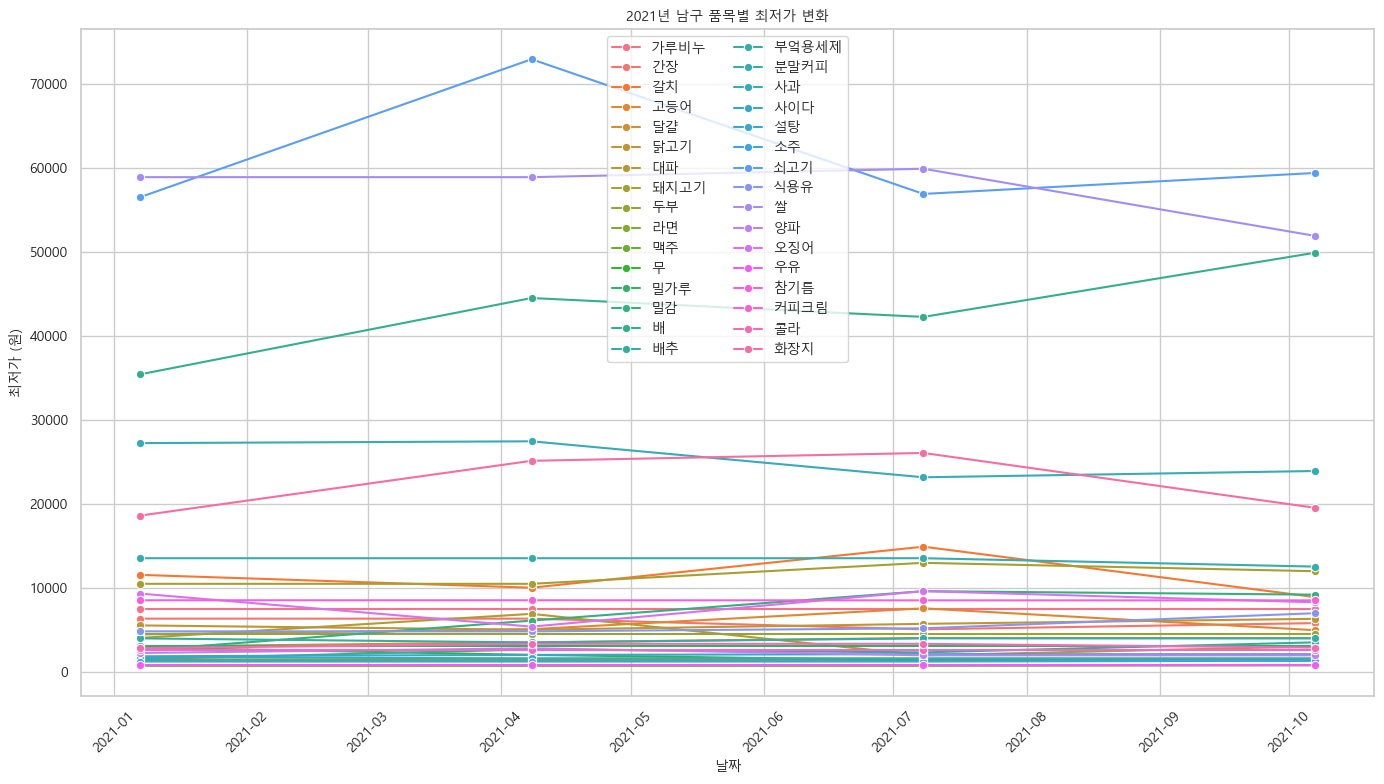

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2021_1q.csv")
q2 = pd.read_csv("남구2021_2q.csv")
q3 = pd.read_csv("남구2021_3q.csv")
q4 = pd.read_csv("남구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 남구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("남구2021_min.csv", index=False, encoding="utf-8-sig")

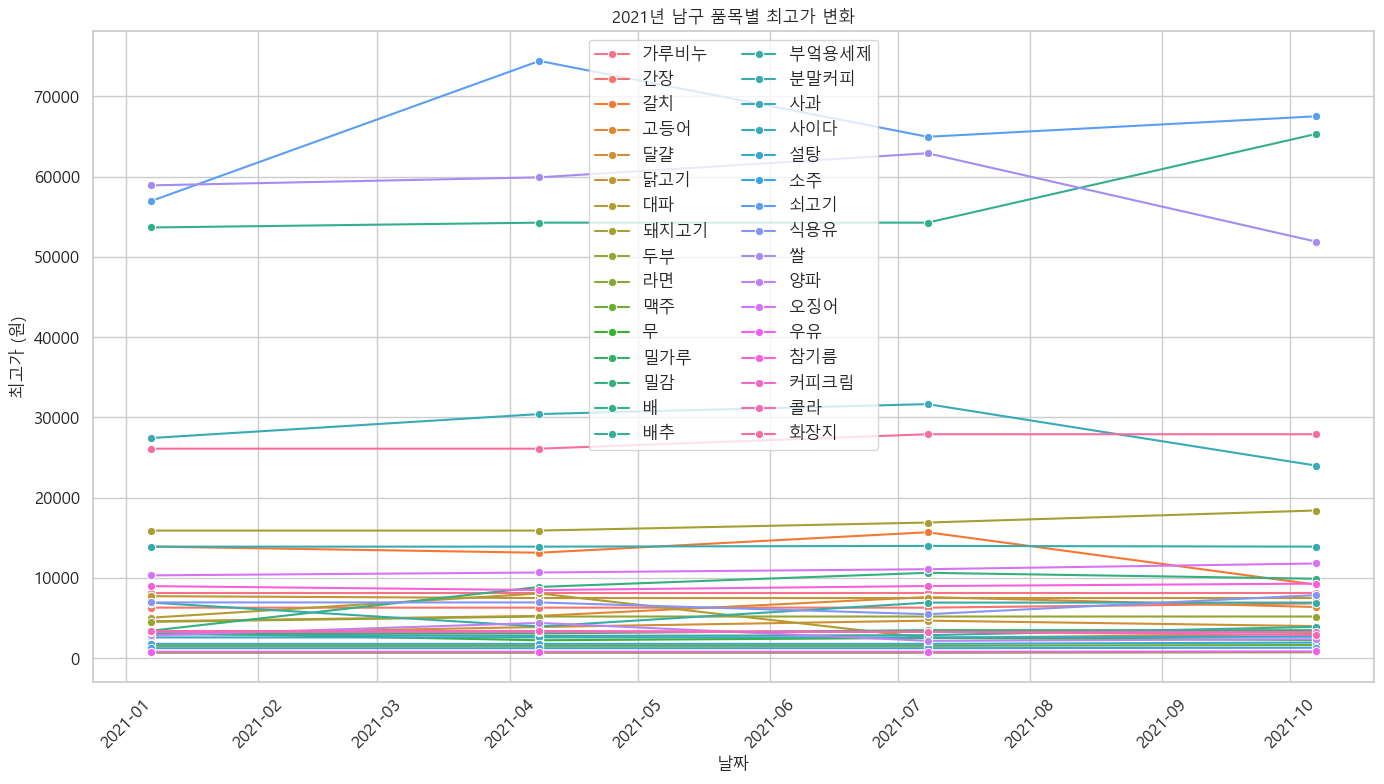

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("남구2021_1q.csv")
q2 = pd.read_csv("남구2021_2q.csv")
q3 = pd.read_csv("남구2021_3q.csv")
q4 = pd.read_csv("남구2021_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2021년 남구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("남구2021_max.csv", index=False, encoding="utf-8-sig")